<a href="https://colab.research.google.com/github/AstrasAI/Python-Machine-Learning-Dataset/blob/main/simplenet2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# Run in a separate cell
import numpy as np
import pandas as pd
import os

np.random.seed(42)
n_samples = 10000
n_fast_flux = n_samples // 2
n_normal = n_samples - n_fast_flux

def generate_fast_flux_data():
    ttl_fast_flux = np.random.uniform(10, 10000, n_fast_flux) + np.random.normal(0, 500, n_fast_flux)
    ttl_fast_flux = np.clip(ttl_fast_flux, 10, 11000)
    unique_ips_fast_flux = np.random.randint(1, 10, n_fast_flux) + np.random.normal(0, 0.5, n_fast_flux)
    unique_ips_fast_flux = np.clip(unique_ips_fast_flux, 1, 11).astype(int)
    query_rate_fast_flux = np.random.uniform(0.1, 25, n_fast_flux) + np.random.normal(0, 3, n_fast_flux)
    query_rate_fast_flux = np.clip(query_rate_fast_flux, 0.05, 28)
    entropy_fast_flux = np.random.uniform(0.8, 4.0, n_fast_flux) + np.random.normal(0, 0.2, n_fast_flux)
    entropy_fast_flux = np.clip(entropy_fast_flux, 0.7, 4.1)
    X_fast_flux = np.column_stack([ttl_fast_flux, unique_ips_fast_flux, query_rate_fast_flux, entropy_fast_flux])
    y_fast_flux = np.ones((n_fast_flux, 1))
    return X_fast_flux, y_fast_flux

def generate_normal_data():
    ttl_normal = np.random.uniform(20, 86400, n_normal) + np.random.normal(0, 5000, n_normal)
    ttl_normal = np.clip(ttl_normal, 10, 100000)
    unique_ips_normal = np.random.randint(1, 10, n_normal) + np.random.normal(0, 0.5, n_normal)
    unique_ips_normal = np.clip(unique_ips_normal, 1, 11).astype(int)
    query_rate_normal = np.random.uniform(0.05, 25, n_normal) + np.random.normal(0, 3, n_normal)
    query_rate_normal = np.clip(query_rate_normal, 0.01, 28)
    entropy_normal = np.random.uniform(0.8, 4.0, n_normal) + np.random.normal(0, 0.2, n_normal)
    entropy_normal = np.clip(entropy_normal, 0.7, 4.1)
    X_normal = np.column_stack([ttl_normal, unique_ips_normal, query_rate_normal, entropy_normal])
    y_normal = np.zeros((n_normal, 1))
    return X_normal, y_normal

X_fast_flux, y_fast_flux = generate_fast_flux_data()
X_normal, y_normal = generate_normal_data()
X = np.vstack([X_fast_flux, X_normal])
y = np.vstack([y_fast_flux, y_normal])
indices = np.random.permutation(n_samples)
X = X[indices]
y = y[indices]
X = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0) + 1e-10)
df = pd.DataFrame(X, columns=['TTL', 'Unique_IPs', 'Query_Rate', 'Entropy'])
df['Label'] = y.flatten()
output_path = '/content/fast_flux_data.csv'
df.to_csv(output_path, index=False)
print(f"Data saved to {output_path}")

Data saved to /content/fast_flux_data.csv


Train set: 7000 samples, X_train shape: (7000, 4), y_train shape: (7000, 1)
Validation set: 1500 samples, X_val shape: (1500, 4), y_val shape: (1500, 1)
Test set: 1500 samples, X_test shape: (1500, 4), y_test shape: (1500, 1)
Epoch 0, Loss: 0.6932
Epoch 5, Loss: 0.6931
Epoch 10, Loss: 0.6931
Epoch 15, Loss: 0.6931
Epoch 20, Loss: 0.6931
Epoch 25, Loss: 0.6931
Epoch 30, Loss: 0.6931
Epoch 35, Loss: 0.6931
Epoch 40, Loss: 0.6931
Epoch 45, Loss: 0.6931
Epoch 50, Loss: 0.6931
Epoch 55, Loss: 0.6931
Epoch 60, Loss: 0.6931
Epoch 65, Loss: 0.6931
Epoch 70, Loss: 0.6931
Epoch 75, Loss: 0.6931
Epoch 80, Loss: 0.6931
Epoch 85, Loss: 0.6931
Epoch 90, Loss: 0.6931
Epoch 95, Loss: 0.6931
Epoch 100, Loss: 0.6931
Epoch 105, Loss: 0.6931
Epoch 110, Loss: 0.6931
Epoch 115, Loss: 0.6931
Epoch 120, Loss: 0.6931
Epoch 125, Loss: 0.6931
Epoch 130, Loss: 0.6931
Epoch 135, Loss: 0.6931
Epoch 140, Loss: 0.6931
Epoch 145, Loss: 0.6931
Epoch 150, Loss: 0.6931
Epoch 155, Loss: 0.6931
Epoch 160, Loss: 0.6931
Epoc

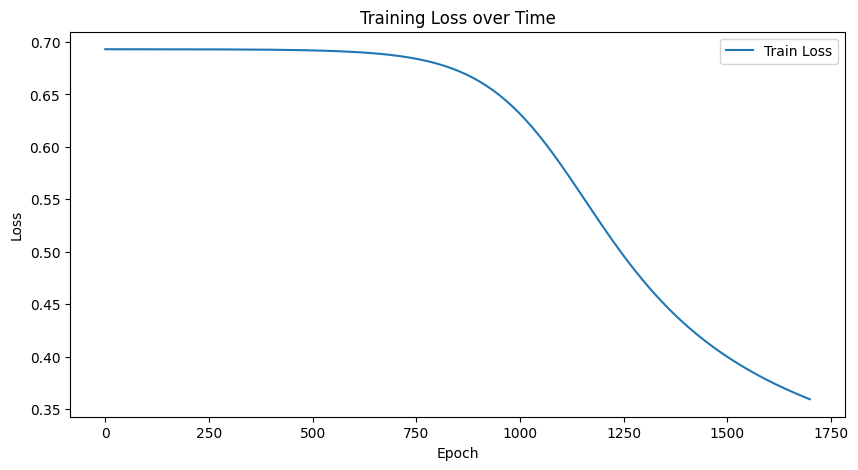


Notes:
- Ensure '/content/fast_flux_data.csv' exists (check file explorer, left panel).
- Metrics should be ~0.85–0.95 due to diverse CSV data.
- If metrics are ~0.99–1.0, consider adding regularization to SimpleNet.
- If errors persist, verify y_train, y_val, y_test shapes before evaluation.


In [7]:
# -*- coding: utf-8 -*-
"""train_simplenet_fast_flux_csv.ipynb

Trains original SimpleNet on fast_flux_data.csv in Colab.
Fixes shape issues for validation and test evaluation.
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score
import os

# Define SimpleNet (exact same as your original)
class SimpleNet:
    def __init__(self, input_size, hidden_size, output_size):
        self.W1 = np.random.randn(input_size, hidden_size) * 0.01
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size) * 0.01
        self.b2 = np.zeros((1, output_size))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def forward(self, X):
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.sigmoid(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = self.sigmoid(self.z2)
        return self.a2

    def backward(self, X, y, output, learning_rate):
        # Backpropagation
        d2 = (output - y) * self.sigmoid_derivative(output)
        dW2 = np.dot(self.a1.T, d2)
        db2 = np.sum(d2, axis=0, keepdims=True)
        d1 = np.dot(d2, self.W2.T) * self.sigmoid_derivative(self.a1)
        dW1 = np.dot(X.T, d1)
        db1 = np.sum(d1, axis=0, keepdims=True)
        # Update weights and biases
        self.W2 -= learning_rate * dW2
        self.b2 -= learning_rate * db2
        self.W1 -= learning_rate * dW1
        self.b1 -= learning_rate * db1

    def train(self, X, y, epochs, learning_rate):
        losses = []
        for epoch in range(epochs):
            # Forward
            output = self.forward(X)
            # Binary cross-entropy loss
            loss = -np.mean(y * np.log(output + 1e-15) + (1 - y) * np.log(1 - output + 1e-15))
            losses.append(loss)
            # Backward
            self.backward(X, y, output, learning_rate)
            if epoch % 5 == 0 or epoch == epochs - 1:
                print(f"Epoch {epoch}, Loss: {loss:.4f}")
        return losses

# Load data from CSV
csv_path = '/content/fast_flux_data.csv'
if not os.path.exists(csv_path):
    raise FileNotFoundError(
        f"CSV file not found at {csv_path}. "
        "Run the data generation script first to create fast_flux_data.csv."
    )
df = pd.read_csv(csv_path)

# Extract features and labels
X = df[['TTL', 'Unique_IPs', 'Query_Rate', 'Entropy']].values
y = df['Label'].values.reshape(-1, 1)  # Ensure (n, 1) shape

# Train-validation-test split (70-15-15)
n_samples = len(X)
train_size = int(0.7 * n_samples)
val_size = int(0.15 * n_samples)
test_size = n_samples - train_size - val_size

# Shuffle indices
np.random.seed(42)
indices = np.random.permutation(n_samples)
X = X[indices]
y = y[indices]

# Split data
X_train = X[:train_size]
y_train = y[:train_size]
X_val = X[train_size:train_size + val_size]
y_val = y[train_size:train_size + val_size]
X_test = X[train_size + val_size:]
y_test = y[train_size + val_size:]

# Verify shapes
print(f"Train set: {X_train.shape[0]} samples, X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"Validation set: {X_val.shape[0]} samples, X_val shape: {X_val.shape}, y_val shape: {y_val.shape}")
print(f"Test set: {X_test.shape[0]} samples, X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

# Initialize and train
np.random.seed(1)
model = SimpleNet(input_size=4, hidden_size=10, output_size=1)
losses = model.train(X_train, y_train, epochs=1700, learning_rate=0.0001)

# Evaluate
def evaluate(X, y, name="Set"):
    y_pred = model.forward(X)
    y_pred_binary = (y_pred > 0.5).astype(int).reshape(-1)  # Flatten to (n,)
    y_true = y.reshape(-1)  # Flatten to (n,)
    accuracy = np.mean(y_pred_binary == y_true)
    precision = precision_score(y_true, y_pred_binary)
    recall = recall_score(y_true, y_pred_binary)
    f1 = f1_score(y_true, y_pred_binary)
    print(f"{name} Metrics:")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1-Score: {f1:.4f}")
    return accuracy, precision, recall, f1

# Evaluate on train, validation, and test sets
evaluate(X_train, y_train, "Train")
evaluate(X_val, y_val, "Validation")
evaluate(X_test, y_test, "Test")

# Plot loss curve
plt.figure(figsize=(10, 5))
plt.plot(losses, label='Train Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss over Time')
plt.legend()
plt.show()

# Instructions for Colab
print("\nNotes:")
print("- Ensure '/content/fast_flux_data.csv' exists (check file explorer, left panel).")
print("- Metrics should be ~0.85–0.95 due to diverse CSV data.")
print("- If metrics are ~0.99–1.0, consider adding regularization to SimpleNet.")
print("- If errors persist, verify y_train, y_val, y_test shapes before evaluation.")

Epoch 0, Loss: 0.6932
Epoch 50, Loss: 0.6740
Epoch 100, Loss: 0.3156
Epoch 150, Loss: 0.2342
Epoch 200, Loss: 0.2065
Epoch 250, Loss: 0.1916
Epoch 299, Loss: 0.1859
Simulation set: 1000 samples, X_sim shape: (1000, 4), y_sim shape: (1000, 1)
Fast flux samples: 700, Normal samples: 300
Fast Flux Attack Simulation Metrics:
  Accuracy: 0.9660
  Precision: 0.9574
  Recall: 0.9957
  F1-Score: 0.9762
Fast Flux Detection Rate: 0.9957
Normal Traffic Correct Rate: 0.8967
Simulation results saved to /content/fast_flux_simulation_final.csv


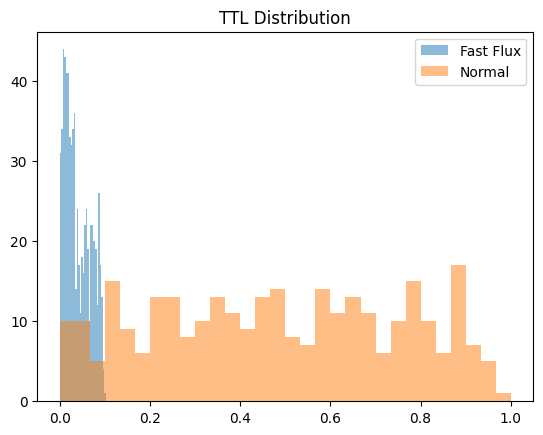

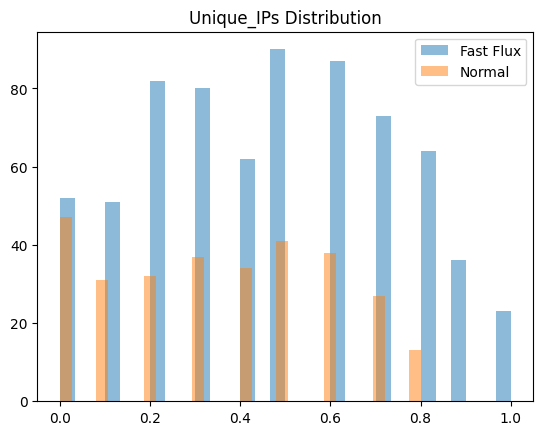

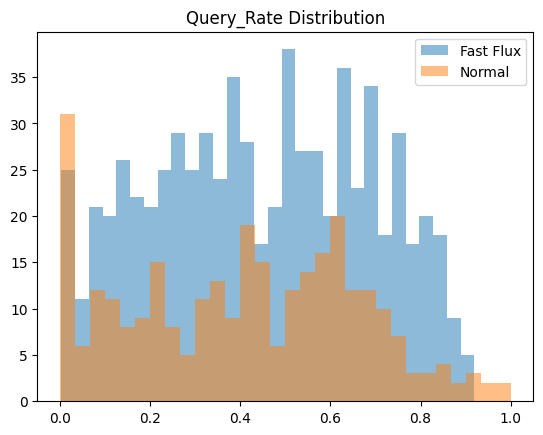

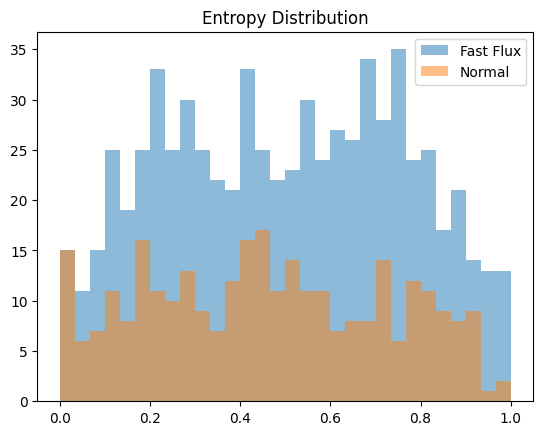

In [2]:
# -*- coding: utf-8 -*-
"""simulate_fast_flux_attack_final.ipynb

Simulates a fast flux attack with maximum ambiguity and tests SimpleNet in Colab.
"""
import os
import numpy as np
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# SimpleNet (unchanged)
class SimpleNet:
    def __init__(self, input_size, hidden_size, output_size):
        self.W1 = np.random.randn(input_size, hidden_size) * 0.01
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size) * 0.01
        self.b2 = np.zeros((1, output_size))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def forward(self, X):
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.sigmoid(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = self.sigmoid(self.z2)
        return self.a2

    def backward(self, X, y, output, learning_rate):
        d2 = (output - y) * self.sigmoid_derivative(output)
        dW2 = np.dot(self.a1.T, d2)
        db2 = np.sum(d2, axis=0, keepdims=True)
        d1 = np.dot(d2, self.W2.T) * self.sigmoid_derivative(self.a1)
        dW1 = np.dot(X.T, d1)
        db1 = np.sum(d1, axis=0, keepdims=True)
        self.W2 -= learning_rate * dW2
        self.b2 -= learning_rate * db2
        self.W1 -= learning_rate * dW1
        self.b1 -= learning_rate * db1

    def train(self, X, y, epochs, learning_rate):
        losses = []
        for epoch in range(epochs):
            output = self.forward(X)
            loss = -np.mean(y * np.log(output + 1e-15) + (1 - y) * np.log(1 - output + 1e-15))
            losses.append(loss)
            self.backward(X, y, output, learning_rate)
            if epoch % 50 == 0 or epoch == epochs - 1:
                print(f"Epoch {epoch}, Loss: {loss:.4f}")
        return losses

# Train model
csv_path = '/content/fast_flux_data.csv'
if not os.path.exists(csv_path):
    raise FileNotFoundError(f"CSV file not found at {csv_path}.")
df = pd.read_csv(csv_path)

X = df[['TTL', 'Unique_IPs', 'Query_Rate', 'Entropy']].values
y = df['Label'].values.reshape(-1, 1)

n_samples = len(X)
train_size = int(0.7 * n_samples)
val_size = int(0.15 * n_samples)
test_size = n_samples - train_size - val_size

np.random.seed(42)
indices = np.random.permutation(n_samples)
X = X[indices]
y = y[indices]

X_train = X[:train_size]
y_train = y[:train_size]

np.random.seed(1)
model = SimpleNet(input_size=4, hidden_size=10, output_size=1)
losses = model.train(X_train, y_train, epochs=300, learning_rate=0.002)  # Adjusted for stability

# Simulate fast flux attack
np.random.seed(456)
n_sim_samples = 1000
n_fast_flux = int(0.7 * n_sim_samples)
n_normal = n_sim_samples - n_fast_flux

def generate_fast_flux_attack():
    # Standard fast flux
    ttl_fast_flux = np.random.uniform(10, 3000, n_fast_flux // 2) + np.random.normal(0, 150, n_fast_flux // 2)
    ttl_fast_flux = np.clip(ttl_fast_flux, 10, 4000)
    unique_ips_fast_flux = np.random.randint(3, 12, n_fast_flux // 2) + np.random.normal(0, 0.5, n_fast_flux // 2)
    unique_ips_fast_flux = np.clip(unique_ips_fast_flux, 1, 12).astype(int)
    query_rate_fast_flux = np.random.uniform(1, 25, n_fast_flux // 2) + np.random.normal(0, 2, n_fast_flux // 2)
    query_rate_fast_flux = np.clip(query_rate_fast_flux, 0.5, 30)
    entropy_fast_flux = np.random.uniform(1, 4, n_fast_flux // 2) + np.random.normal(0, 0.2, n_fast_flux // 2)
    entropy_fast_flux = np.clip(entropy_fast_flux, 0.8, 4.2)
    X_fast_flux = np.column_stack([ttl_fast_flux, unique_ips_fast_flux, query_rate_fast_flux, entropy_fast_flux])
    y_fast_flux = np.ones((n_fast_flux // 2, 1))

    # Edge case: fast flux mimicking normal
    ttl_edge = np.random.uniform(3000, 9000, n_fast_flux // 2) + np.random.normal(0, 300, n_fast_flux // 2)
    ttl_edge = np.clip(ttl_edge, 3000, 10000)
    unique_ips_edge = np.random.randint(1, 10, n_fast_flux // 2) + np.random.normal(0, 0.5, n_fast_flux // 2)
    unique_ips_edge = np.clip(unique_ips_edge, 1, 12).astype(int)
    query_rate_edge = np.random.uniform(0.5, 25, n_fast_flux // 2) + np.random.normal(0, 2, n_fast_flux // 2)
    query_rate_edge = np.clip(query_rate_edge, 0.1, 30)
    entropy_edge = np.random.uniform(0.8, 4, n_fast_flux // 2) + np.random.normal(0, 0.2, n_fast_flux // 2)
    entropy_edge = np.clip(entropy_edge, 0.7, 4.2)
    X_edge = np.column_stack([ttl_edge, unique_ips_edge, query_rate_edge, entropy_edge])
    y_edge = np.ones((n_fast_flux // 2, 1))

    X = np.vstack([X_fast_flux, X_edge])
    y = np.vstack([y_fast_flux, y_edge])
    return X, y

def generate_normal_sim():
    ttl_normal = np.random.uniform(30, 86400, n_normal) + np.random.normal(0, 5000, n_normal)
    ttl_normal = np.clip(ttl_normal, 20, 100000)
    unique_ips_normal = np.random.randint(1, 10, n_normal) + np.random.normal(0, 0.5, n_normal)
    unique_ips_normal = np.clip(unique_ips_normal, 1, 12).astype(int)
    query_rate_normal = np.random.uniform(0.05, 25, n_normal) + np.random.normal(0, 3, n_normal)
    query_rate_normal = np.clip(query_rate_normal, 0.01, 30)
    entropy_normal = np.random.uniform(0.8, 4.0, n_normal) + np.random.normal(0, 0.2, n_normal)
    entropy_normal = np.clip(entropy_normal, 0.7, 4.2)
    X_normal = np.column_stack([ttl_normal, unique_ips_normal, query_rate_normal, entropy_normal])
    y_normal = np.zeros((n_normal, 1))
    return X_normal, y_normal

X_fast_flux, y_fast_flux = generate_fast_flux_attack()
X_normal, y_normal = generate_normal_sim()
X_sim = np.vstack([X_fast_flux, X_normal])
y_sim = np.vstack([y_fast_flux, y_normal])
indices = np.random.permutation(n_sim_samples)
X_sim = X_sim[indices]
y_sim = y_sim[indices]
X_sim = (X_sim - X_sim.min(axis=0)) / (X_sim.max(axis=0) - X_sim.min(axis=0) + 1e-10)

print(f"Simulation set: {X_sim.shape[0]} samples, X_sim shape: {X_sim.shape}, y_sim shape: {y_sim.shape}")
print(f"Fast flux samples: {int(np.sum(y_sim))}, Normal samples: {n_sim_samples - int(np.sum(y_sim))}")

# Evaluate
def evaluate(X, y, name="Simulation"):
    y_pred = model.forward(X)
    y_pred_binary = (y_pred > 0.5).astype(int).reshape(-1)
    y_true = y.reshape(-1)
    accuracy = np.mean(y_pred_binary == y_true)
    precision = precision_score(y_true, y_pred_binary)
    recall = recall_score(y_true, y_pred_binary)
    f1 = f1_score(y_true, y_pred_binary)
    print(f"{name} Metrics:")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1-Score: {f1:.4f}")

    fast_flux_pred = y_pred_binary[y_true == 1]
    normal_pred = y_pred_binary[y_true == 0]
    fast_flux_correct = np.mean(fast_flux_pred == 1)
    normal_correct = np.mean(normal_pred == 0)
    print(f"Fast Flux Detection Rate: {fast_flux_correct:.4f}")
    print(f"Normal Traffic Correct Rate: {normal_correct:.4f}")

    return accuracy, precision, recall, f1

evaluate(X_sim, y_sim, "Fast Flux Attack Simulation")

# Save results
df_sim = pd.DataFrame(X_sim, columns=['TTL', 'Unique_IPs', 'Query_Rate', 'Entropy'])
df_sim['True_Label'] = y_sim.flatten()
df_sim['Predicted_Label'] = (model.forward(X_sim) > 0.5).astype(int).flatten()
df_sim.to_csv('/content/fast_flux_simulation_final.csv', index=False)
print("Simulation results saved to /content/fast_flux_simulation_final.csv")

# Plot distributions
for feature in ['TTL', 'Unique_IPs', 'Query_Rate', 'Entropy']:
    plt.figure()
    plt.hist(df_sim[df_sim['True_Label'] == 1][feature], bins=30, alpha=0.5, label='Fast Flux')
    plt.hist(df_sim[df_sim['True_Label'] == 0][feature], bins=30, alpha=0.5, label='Normal')
    plt.title(f'{feature} Distribution')
    plt.legend()
    plt.show()